# Переобучение на сайте playground.tensorflow

* Круг

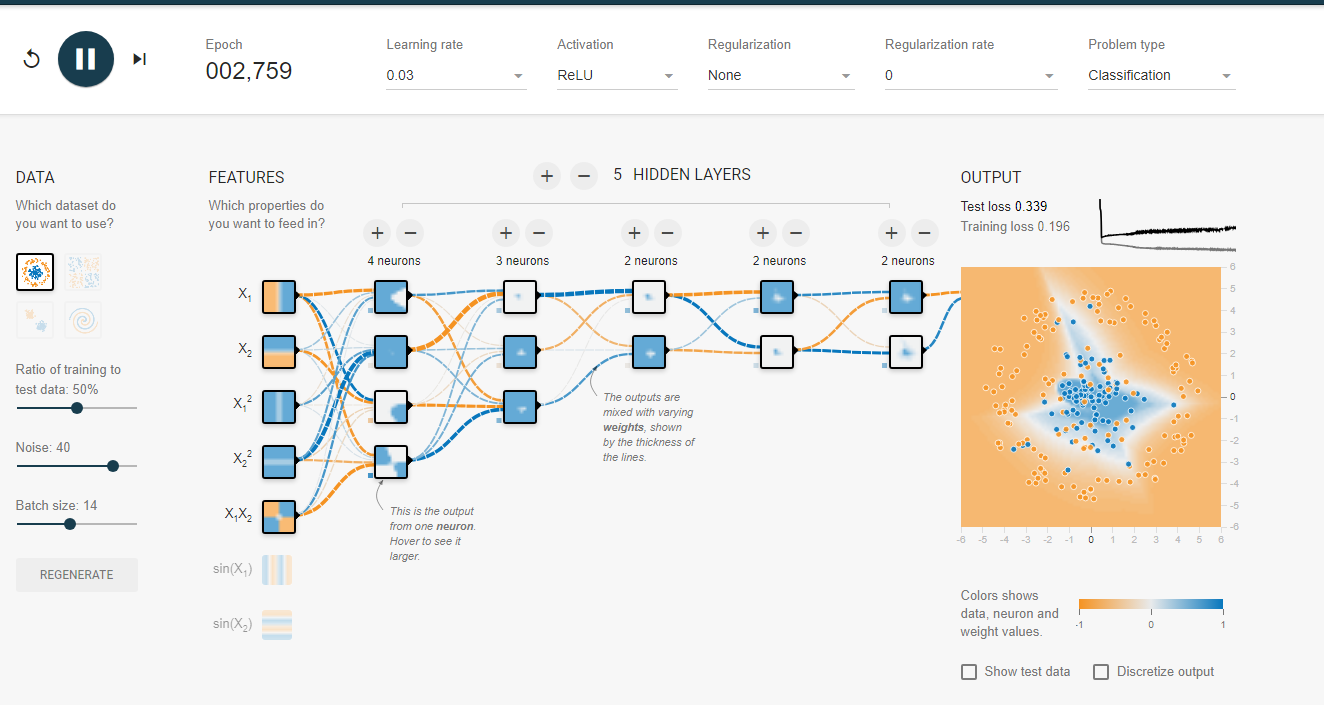

* XOR

* Гауссовское распределение

* Спираль

# Реализация элементарного перцептрона

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Генерация выборок

In [ ]:
def circle(n_points=1000, noise=0.1, percent=0.5):
    inner_count = int(n_points*percent)
    outter_count = int(n_points*(1.0-percent))

    inner_angles = np.linspace(0, 2 * np.pi, num=inner_count)
    inner_radii = np.random.uniform(0, 1, size=inner_count)

    outter_angles = np.linspace(0, 2 * np.pi, num=outter_count)
    outter_radii = np.random.uniform(0, 1, size=outter_count)

    inner_circle_x = inner_radii * np.cos(inner_angles)
    inner_circle_y = inner_radii * np.sin(inner_angles)

    outer_circle_x = (outter_radii + 1.2) * np.cos(outter_angles)
    outer_circle_y = (outter_radii + 1.2) * np.sin(outter_angles)

    X = np.vstack((np.column_stack((inner_circle_x, inner_circle_y)), np.column_stack((outer_circle_x, outer_circle_y))))
    y = np.hstack((np.zeros(inner_count), np.ones(outter_count)))

    X += np.random.uniform(-noise, noise, X.shape)

    return X, y

In [ ]:
def exclusive_or(n_points=200, noise=0.1):
    points = n_points // 4
    radius = 0.5

    centers = np.array([
        [-1, 1],
        [1, 1],
        [-1, -1],
        [1, -1]
    ])

    X = np.vstack([np.random.randn(points, 2) * radius + center for center in centers])

    y = np.array([1] * points + [0] * points +
                 [0] * points + [1] * points)

    return X, y

In [ ]:
def gaussian(n_points=200, noise=0.1):
    center1 = np.array([1, 1])
    center2 = np.array([-1, -1])
    radius = 0.5

    X1 = np.random.randn(n_points // 2, 2) * radius + center1
    X2 = np.random.randn(n_points // 2, 2) * radius + center2
    X = np.vstack((X1, X2))

    y = np.hstack((np.zeros(n_points // 2), np.ones(n_points // 2)))

    X += np.random.uniform(-noise, noise, X.shape)
    return X, y

In [ ]:
def spiral(n_points=100, noise=0.2):
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
            np.hstack((np.zeros(n_points), np.ones(n_points))))

### Пример генерации выборки

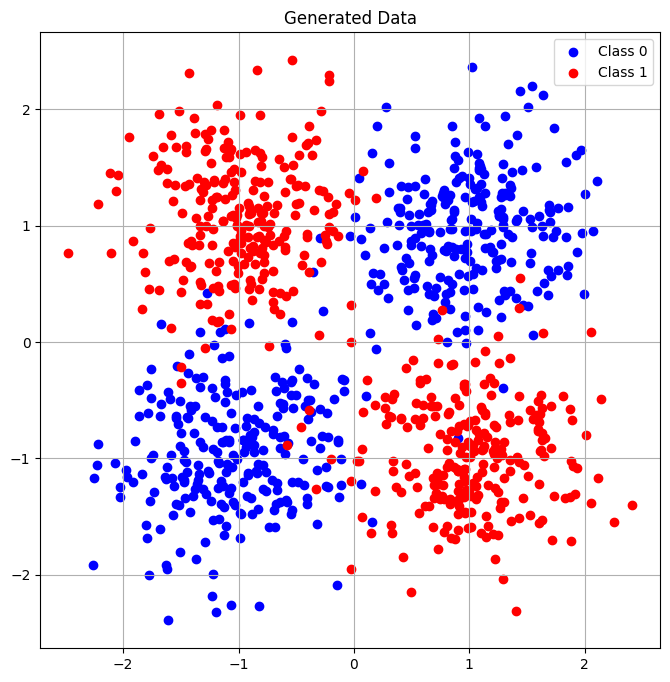

In [ ]:
# Генерируем данные
X, y = exclusive_or(1000,0.5)

# Разделяем данные по классам
class_0 = X[y == 0]
class_1 = X[y == 1]

# Рисуем график
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], c='b', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='r', label='Class 1')
plt.title('Generated Data')
plt.legend()
plt.grid(True)
plt.show()

## Функции активации

* Ступенчетая функция активации

In [ ]:
def step_func(x):
    return np.where(x >= 0, 1, 0)

* Сигмоидальная функция активации

In [ ]:
def sigmoid_func(x):
    return 1 / (1 + np.exp(-np.clip(x, -20, 20)))

## Элементарный **перцептрон**

In [ ]:
class Perceptron():